In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
%matplotlib inline

# Part-1: Data Exploration and Pre-processing
- 1) load the given dataset 
-2) print all the column names 
-3) describe the data
-4) check the null value 
-5) if there are Null values, Handle these

- ## 1) load the given dataset

In [5]:
df = pd.read_csv(r'C:\Users\123\Downloads\jainik\data science\Project\Python\Python Project 4 Logistics Regression Titanic Survival\Python_Project_4_Log.csv')

- ## 2) print all the column names

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- ## 3)describe the data

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- ## 4) check the null value

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- ## 5) if there are Null values, Handle these

In [7]:
# we don't need Cabin column 
df.drop(columns='Cabin',axis=1,inplace=True)

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:xlabel='Sex', ylabel='Age'>

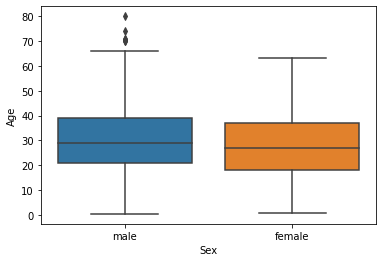

In [8]:

sns.boxplot(data=df,x='Sex',y='Age')

In [9]:
def mean_age(cols):
    Age = cols[0]
    Sex = cols[1]
    
    if pd.isnull(Age):
        
        if Sex == 'male':
            return 30
        else:
            return 27
    else:
        return Age

In [10]:
df['Age']=df[['Age','Sex']].apply(mean_age,axis=1)

In [11]:
df['Age'] = df['Age'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(4)
memory usage: 73.2+ KB


In [13]:
df.dropna(inplace=True)

In [14]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
df.shape

(889, 11)

In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C


----

## Part-2: Working with Models 
- 1) Create the target data and feature data where target data is survived
-2) Split the data into Training and testing Set 
-3) Create a Logistic regression model for Target and feature data 
-4) Display the Confusion Matrix
-5) Find the Accuracy Score 
-6) Find the Precision Score 
-7) Find the Recall Score 
-8) Find the F1 Score 
-9) Find the probability of testing data 
-10) Display ROC Curve and find the AUC score 

- ## 1) Create the target data and feature data where target data is survived

In [17]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C


In [16]:
#i remove this columns because this are not that much important

feature = df.drop(['PassengerId','Survived','Name','Ticket'],axis=1)
target = df.Survived

In [17]:
feature['Sex'] = pd.get_dummies(feature['Sex'])
feature['Embarked'] = pd.get_dummies(feature['Embarked'])

In [18]:
feature['Embarked'].unique()

array([0, 1], dtype=uint8)

In [19]:
feature

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22,1,0,7.2500,0
1,1,1,38,1,0,71.2833,1
2,3,1,26,0,0,7.9250,0
3,1,1,35,1,0,53.1000,0
4,3,0,35,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27,0,0,13.0000,0
887,1,1,19,0,0,30.0000,0
888,3,1,27,1,2,23.4500,0
889,1,0,26,0,0,30.0000,1


we have to encod first

In [22]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,27,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C


- ## 2) Split the data into Training and testing Set

In [20]:
x_train,x_test,y_train,y_test = train_test_split (feature,target,test_size=0.3)

- ## 3) Create a Logistic regression model for Target and feature data

In [24]:
logistic = LogisticRegression()

In [25]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622 entries, 231 to 325
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    622 non-null    int64  
 1   Sex       622 non-null    uint8  
 2   Age       622 non-null    int32  
 3   SibSp     622 non-null    int64  
 4   Parch     622 non-null    int64  
 5   Fare      622 non-null    float64
 6   Embarked  622 non-null    uint8  
dtypes: float64(1), int32(1), int64(3), uint8(2)
memory usage: 27.9 KB


In [26]:
for i in x_train.columns:
    print(i,x_train[i].unique(),sep=' :----- ')

Pclass :----- [3 1 2]
Sex :----- [0 1]
Age :----- [29 27 28 30 25 41 17 24 19 21 32  1 36 34 44 52 18 26 14  2 51 49 20 42
 33 11 31 46  4 62 22 16 60 54 47 45 23  0  5 35 39 40 56 48 12 58 63 80
 50  8  3 61 43 15 74  6  7 38 37  9 66 13 65 70 53 10 55]
SibSp :----- [0 1 2 4 5 8 3]
Parch :----- [0 2 1 5 3 4 6]
Fare :----- [  7.775  146.5208  12.65    12.475    7.7292   0.      14.1083  41.5792
  57.      49.5042   7.05     7.8958  10.5     39.6875  26.       8.05
 151.55     7.7958   8.1583   9.5     24.15    47.1     24.      13.5
  13.      93.5     14.4542  31.275   15.5     56.4958   7.75    56.9292
   7.25     7.55    20.525   22.3583  46.9      8.6833   7.65     7.225
  26.25    13.4167  21.6792  69.55    31.       9.35     7.8292  39.
  52.      78.2667   7.2292   7.925   15.85     7.8542  52.5542  26.3875
  57.9792  30.0708   9.8417 134.5      7.4958   6.975   50.      86.5
   7.6292  20.2125  66.6      7.125    9.825   16.1     15.2458  21.
   6.95    20.25    11.5     29.7  

In [27]:
logistic.fit(x_train,y_train)

LogisticRegression()

In [28]:
logistic.score(x_test,y_test)

0.7752808988764045

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

In [30]:
y_pred = logistic.predict(x_test)

- ## 4) Display the Confusion Matrix

In [31]:
confusion_matrix(y_test,y_pred)

array([[140,  36],
       [ 24,  67]], dtype=int64)

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       176
           1       0.65      0.74      0.69        91

    accuracy                           0.78       267
   macro avg       0.75      0.77      0.76       267
weighted avg       0.78      0.78      0.78       267



- ## 5) Find the Accuracy Score

In [33]:
accuracy_score(y_test,y_pred)

0.7752808988764045

- ## 6) Find the Precision Score

In [34]:
precision_score(y_test,y_pred)

0.6504854368932039

- ## 7) Find the Recall Score

In [35]:
recall_score(y_test,y_pred)

0.7362637362637363

- ## 8) Find the F1 Score

In [36]:
f1_score(y_test,y_pred)

0.6907216494845361

- ## 9) Find the probability of testing data

In [37]:
y_prob = logistic.predict_proba(x_test)

In [38]:
y_prob

array([[0.93645606, 0.06354394],
       [0.89052182, 0.10947818],
       [0.96995103, 0.03004897],
       [0.66208822, 0.33791178],
       [0.852688  , 0.147312  ],
       [0.33368278, 0.66631722],
       [0.92943899, 0.07056101],
       [0.04693418, 0.95306582],
       [0.08296995, 0.91703005],
       [0.67950867, 0.32049133],
       [0.76940098, 0.23059902],
       [0.70469627, 0.29530373],
       [0.87139027, 0.12860973],
       [0.89052182, 0.10947818],
       [0.64171164, 0.35828836],
       [0.83475079, 0.16524921],
       [0.24126887, 0.75873113],
       [0.60777813, 0.39222187],
       [0.2209991 , 0.7790009 ],
       [0.10351345, 0.89648655],
       [0.88445798, 0.11554202],
       [0.23187492, 0.76812508],
       [0.30490555, 0.69509445],
       [0.91157617, 0.08842383],
       [0.59880763, 0.40119237],
       [0.03170929, 0.96829071],
       [0.91444924, 0.08555076],
       [0.75913414, 0.24086586],
       [0.93929938, 0.06070062],
       [0.24366625, 0.75633375],
       [0.

- ## 10) Display ROC Curve and find the AUC score

In [39]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

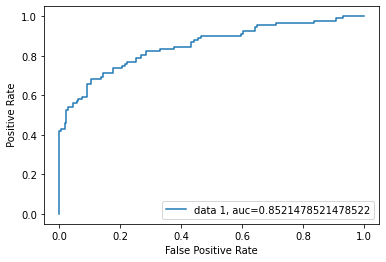

In [41]:
y_prob = logistic.predict_proba(x_test)[::,1]
fpr, tpr, threshold = roc_curve(y_test,  y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr,tpr,label="data 1, auc=" +str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel(" Positive Rate")

plt.show()